# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [2]:
# Numpy and PAndas for basic manupulation
import numpy as np
import pandas as pd
#data visulization Ploty , matlab and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supervise learning libs and apis
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read the dataset
df=pd.read_csv('/content/drive/MyDrive/Python-Google-Colab/Project3-SVL-ReCell/used_device_data.csv')

In [5]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## Data Overview

In [6]:
data = df.copy()

In [7]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [8]:
data.shape

(3454, 15)

####Observation:
- Total rows = 3454
- Total columns  = 15

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [10]:
data.isnull().sum().sort_values(ascending=False) #Checking any NULL values in data set

main_camera_mp           179
weight                     7
battery                    6
int_memory                 4
ram                        4
selfie_camera_mp           2
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

####Observations:

 The columns are missing values as belows:
 - main_camera_mp : 179
 - weight : 7
 - battery 6
 - int_memory : 4
 - ram : 4
 - selfie_camera_mp : 2
 - rest remainingin columns are not missing any values.


####Missing values and its analysis:

In [11]:
#Missing "Main Camera mp" column related information:
missing_camera = data[data["main_camera_mp"].isnull()]
missing_camera.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297


In [12]:
missing_camera["os"].value_counts() # which type to Operating System phone's camera information is missing

Android    179
Name: os, dtype: int64

In [13]:
missing_camera["brand_name"].value_counts() # Which brand of phone's camera related information is missing

Realme        36
Xiaomi        23
Oppo          20
Motorola      18
OnePlus       17
Meizu         15
Vivo          14
Infinix       10
Sony           7
ZTE            4
Asus           4
BlackBerry     4
Coolpad        3
Lava           2
Panasonic      2
Name: brand_name, dtype: int64

####Observation on missing "main_camera_mp":
  - missing information on camera of the phone has Operating system : Android  OS
  - The phone brands whose camera information is missing are Android base phone brands like, Oppo, Motorola, Vivo etc....

In [14]:
# Missing "weight" column analysis:
missing_weight = data[data["weight"].isnull()]
missing_weight

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3002,XOLO,Android,12.70,yes,no,13.0,5.0,32.0,4.0,2400.0,NaN,2015,576,4.165890,4.930437
3003,XOLO,Android,12.83,yes,no,8.0,5.0,16.0,4.0,3200.0,NaN,2015,800,4.282068,5.189228
3004,XOLO,Android,12.70,no,no,8.0,2.0,32.0,4.0,2100.0,NaN,2015,878,3.879706,4.081090
3005,XOLO,Android,10.29,no,no,5.0,0.3,32.0,4.0,1800.0,NaN,2015,1036,3.823847,4.396053
3006,XOLO,Android,12.70,no,no,5.0,0.3,16.0,4.0,2500.0,NaN,2015,679,3.837084,4.347176
3007,XOLO,Windows,12.70,no,no,8.0,2.0,32.0,4.0,2200.0,NaN,2015,838,3.707210,4.791733
3008,XOLO,Android,12.70,no,no,8.0,5.0,32.0,4.0,2500.0,NaN,2015,1045,4.184642,4.785406


In [15]:
missing_weight["os"].value_counts()

Android    6
Windows    1
Name: os, dtype: int64

In [16]:
missing_weight["brand_name"].value_counts()

XOLO    7
Name: brand_name, dtype: int64

####Observation on missing "weight" column analysis:
- Totl 7 rows are missing information on weight.
- Brand named "XOLO" based on either Android or Windows are missing weight information

In [17]:
# Missing "battery" colun analysis:
missing_battery = data[data["battery"].isnull()]
missing_battery.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1829,Meizu,Android,12.83,yes,no,13.0,5.0,16.00,4.00,NaN,145.0,2014,986,4.177919,4.863604
1831,Meizu,Android,12.83,yes,no,20.7,5.0,16.00,4.00,NaN,158.0,2014,1043,4.878855,5.990639
1832,Meizu,Android,13.61,yes,no,20.7,2.0,16.00,4.00,NaN,147.0,2014,1007,4.742320,5.826118
1962,Microsoft,Windows,25.55,no,no,5.0,3.5,32.00,4.00,NaN,675.9,2013,931,5.230574,5.802753
2058,Nokia,Others,5.18,no,no,0.3,0.0,0.06,0.02,NaN,81.0,2016,815,2.718660,3.374511


In [18]:
missing_battery["os"].value_counts()

Android    3
Others     2
Windows    1
Name: os, dtype: int64

In [19]:
missing_battery["brand_name"].value_counts()

Meizu        3
Nokia        2
Microsoft    1
Name: brand_name, dtype: int64

####Observation on missing "Battery" Colun:
 - Total 6 rows are missing battery information.
 -  3 Android OS phone brand Meizu , 2 Other  OS  phone brand Nokia and 1 Windows OS phone brand Microsoft is missing information on battery.

In [20]:
# Missing  "int_memory" column analysis:
missing_memory = data[data["int_memory"].isnull()]
missing_memory

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
117,Nokia,Others,5.18,yes,no,0.3,0.0,NaN,0.02,1200.0,86.5,2019,234,2.721295,3.688379
2035,Nokia,Others,5.18,no,no,5.0,0.0,NaN,0.03,1020.0,157.0,2019,501,2.343727,3.420346
2064,Nokia,Others,5.18,no,no,0.3,0.0,NaN,0.02,1100.0,78.4,2015,559,2.587012,3.378611
2092,Nokia,Others,7.62,no,no,5.0,0.0,NaN,0.02,1010.0,100.0,2013,1043,3.535728,4.370586


In [21]:
missing_memory["os"].value_counts()

Others    4
Name: os, dtype: int64

In [22]:
missing_memory["brand_name"].value_counts()

Nokia    4
Name: brand_name, dtype: int64

####Observation on missing "int_memory" column:
- Total 4 rows are missing values
- Brand Nokia and OS other is missing memory information

In [23]:
# Missing "ram" column analysis:
Missing_ram = data[data["ram"].isnull()]
Missing_ram

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
114,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,1020.0,91.3,2020,288,2.729159,2.911263
335,Nokia,Others,5.18,no,no,0.3,0.0,0.10,NaN,1200.0,88.2,2020,327,3.062924,3.689129
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,NaN,82.6,2016,1023,2.765060,3.657905
2090,Nokia,Others,7.62,no,no,5.0,0.0,0.06,NaN,1200.0,111.4,2013,1001,3.827771,4.605770


In [24]:
Missing_ram["os"].value_counts()

Others    4
Name: os, dtype: int64

In [25]:
Missing_ram["brand_name"].value_counts()

Nokia    4
Name: brand_name, dtype: int64

####Observation on missing "RAM" column:
- Total 4 rows are missing values
- Brand Nokia and OS other is missing RAM information

In [26]:
# Missing "Selfie_camera_mp" column analysis:
m_selfie_camera = data[data["selfie_camera_mp"].isnull()]
m_selfie_camera.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1080,Google,Android,15.32,yes,no,12.2,NaN,64.0,4.0,3430.0,184.0,2018,475,5.573826,6.865974
1081,Google,Android,12.83,yes,no,12.2,NaN,64.0,4.0,2915.0,148.0,2018,424,4.464988,6.745083


####Observation "selfie_camera_mp" column:
- Only 2 row are missing value of it.
- Both are having same OS as Android and Brnad as Google.

####Observation on Missing columns are:

- majority missing values are having Android OS phones
- not all missing columns information from same type of company phones.

In [27]:
data.describe().T # Statistical data summery

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


In [28]:
data.nunique() # To find unique values in each columns

brand_name                 34
os                          4
screen_size               142
4g                          2
5g                          2
main_camera_mp             41
selfie_camera_mp           37
int_memory                 15
ram                        12
battery                   324
weight                    555
release_year                8
days_used                 924
normalized_used_price    3094
normalized_new_price     2988
dtype: int64

In [29]:
data["os"].value_counts() # how many Os are thater in this data set?

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

In [30]:
data["brand_name"].value_counts() #Total number of brand of the phones are???

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

####Overall Observation on given dataset:
- total 15 coulmns are there
- Differnt number of OS are 4
- Unique  phone brands are : 34
- the phone model release year are : 8

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [32]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


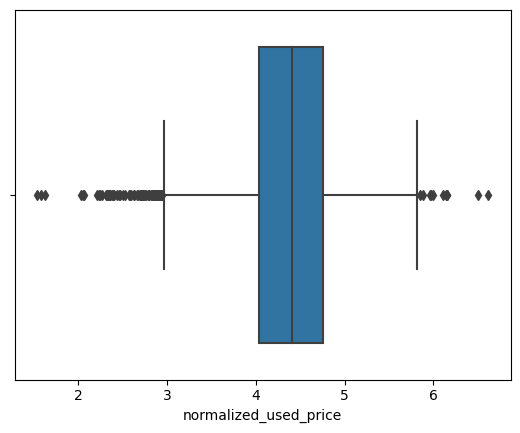

In [33]:
# Q1: What does the distribution of normalized used device prices look like?
sns.boxplot(data=data, x='normalized_used_price');

<Axes: xlabel='normalized_used_price', ylabel='Count'>

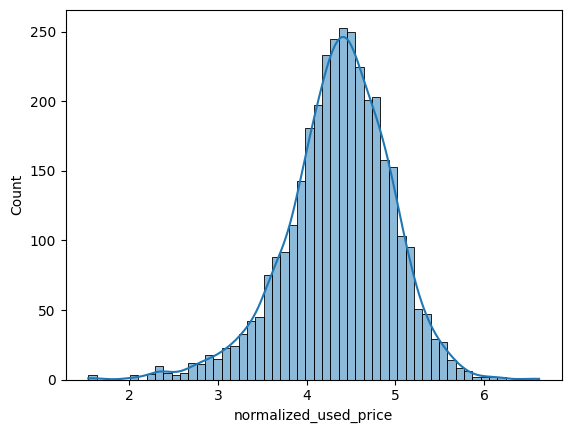

In [34]:
sns.histplot(data=data, x='normalized_used_price', kde=True)

####Observation: Q1: What does the distribution of normalized used device prices look like?

- The priced of used phone has normalized distribution , that can be seen in Histoplot
- While looking at Boxplot, we can see there are outliers

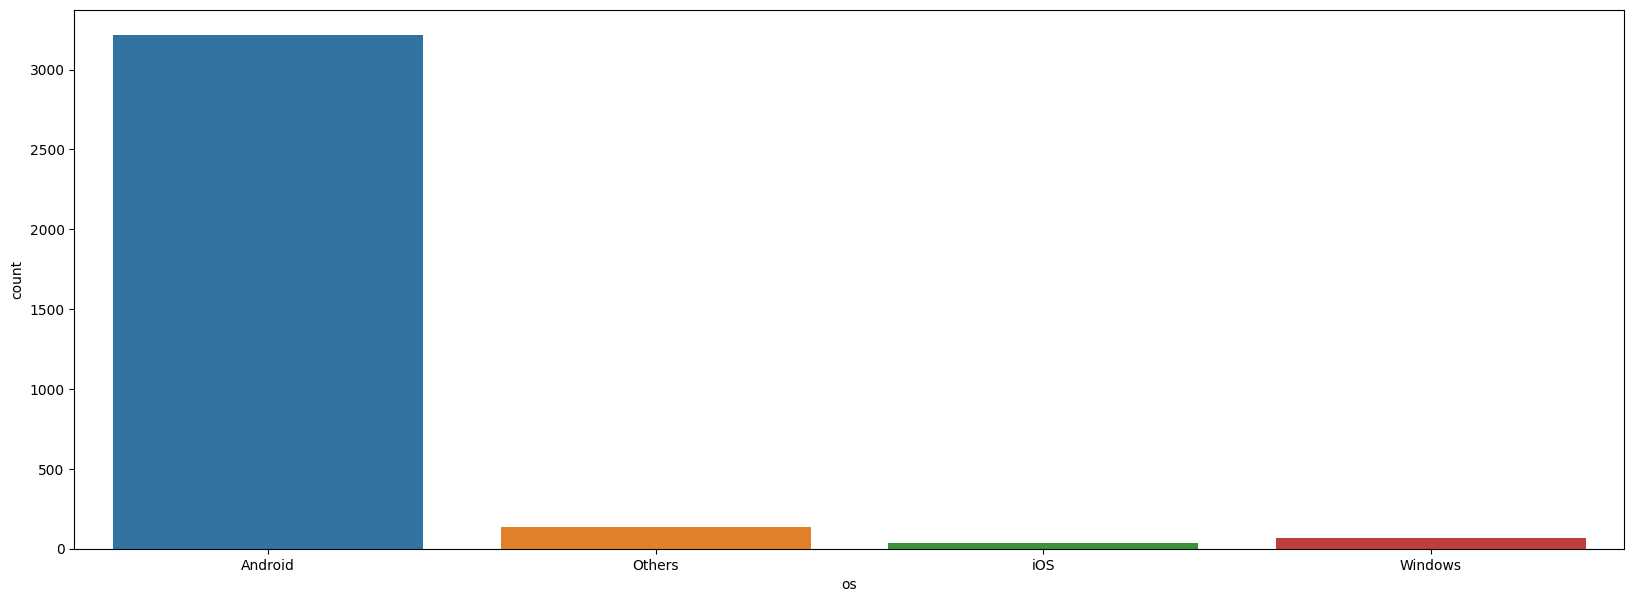

In [35]:
#Q2: What percentage of the used device market is dominated by Android devices?
plt.figure(figsize=(20,7))
sns.countplot(data=data, x='os');

In [36]:
total = len(data["os"])
total
each_OS = data["os"].value_counts()
each_OS
android = len(data[data["os"] == "Android"])
android
#count_android
#count = data["os"].nunique()
#count

percentage = ((android / total)*100)
percentage

93.05153445280834

####Observation: Q2: What percentage of the used device market is dominated by Android devices?

- Total 93.0515 % is Android market

<Figure size 1500x500 with 0 Axes>

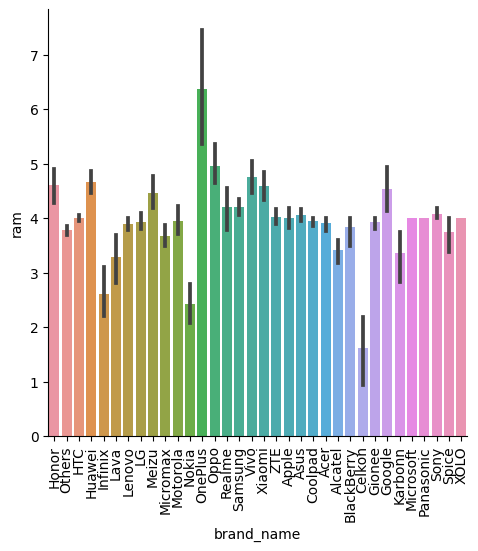

In [37]:
#Q3: The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
each_ram = data["ram"].value_counts()
each_ram
#plt.figure(figsize=(20,7))
#sns.catplot(data=data, x='brand_name', y='ram', kind='point');

#plt.figure(figsize=(50,40))
#sns.stripplot(data=data, x='brand_name', y='ram', jitter=True);
#plt.figure(figsize=(100,40))
#sns.violinplot(data=data, x='brand_name', y='ram', palette="bright");

plt.figure(figsize=(15,5))
sns.catplot(data=data,x= 'brand_name', y='ram', kind='bar')
plt.xticks(rotation=90);

####Observation: Q3: The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

- majority of brand has 4 GB ram standard
- Although in in case of OpenPlus the ram size is higher than 4gb.
- in case of Infinix, Nokia and Cellkon, the ram size is lesser than 4 GBs.

In [38]:
#Q4: A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

battery = data[data["battery"]> 4500.0]
battery_c = battery.value_counts().count()
battery.shape



(341, 15)

In [39]:
battery['brand_name'].value_counts()

Samsung      50
Others       41
Huawei       37
Xiaomi       31
Lenovo       28
Asus         22
Apple        17
Honor        14
Motorola     14
Vivo         13
LG           12
Realme       12
Gionee       10
ZTE          10
Acer          7
Infinix       6
Sony          6
Oppo          4
Alcatel       1
Google        1
HTC           1
Micromax      1
Nokia         1
Panasonic     1
Spice         1
Name: brand_name, dtype: int64

In [40]:
battery['os'].value_counts()

Android    324
iOS         14
Others       3
Name: os, dtype: int64

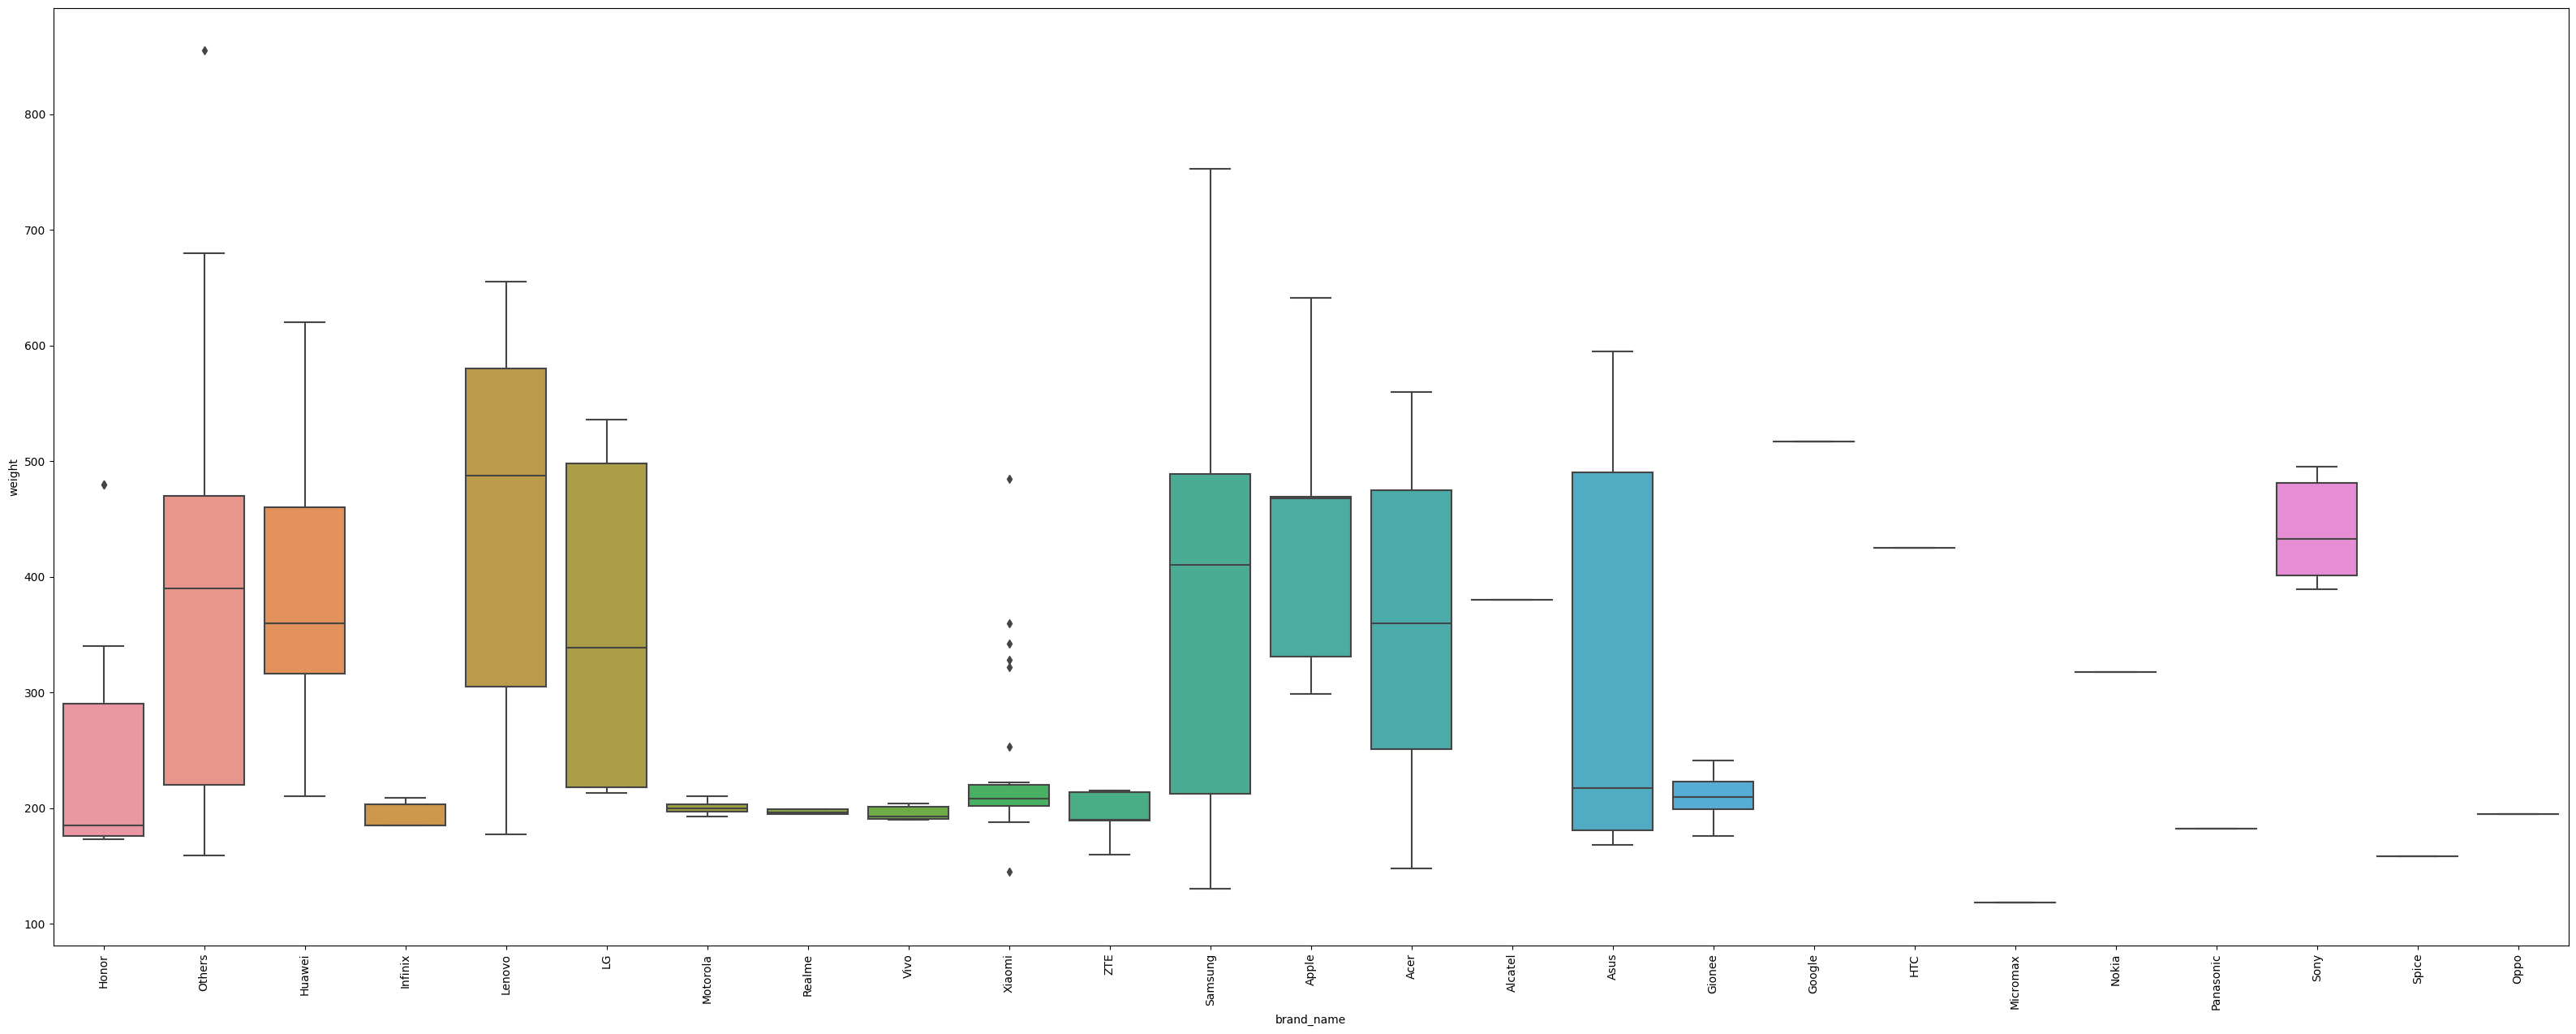

In [41]:
#sns.jointplot(data=data, x=battery['battery'], y='weight', kind="hex");
#plt.colorbar();
plt.figure(figsize=(40,15))
sns.boxplot(x ='brand_name' , y = 'weight' , data = battery)
plt.xticks(rotation = 90)
plt.show()


#plt.figure(figsize=(40,15))
#sns.catplot(data=data,x= battery, y='weight', kind='bar')
#plt.xticks(rotation=90);

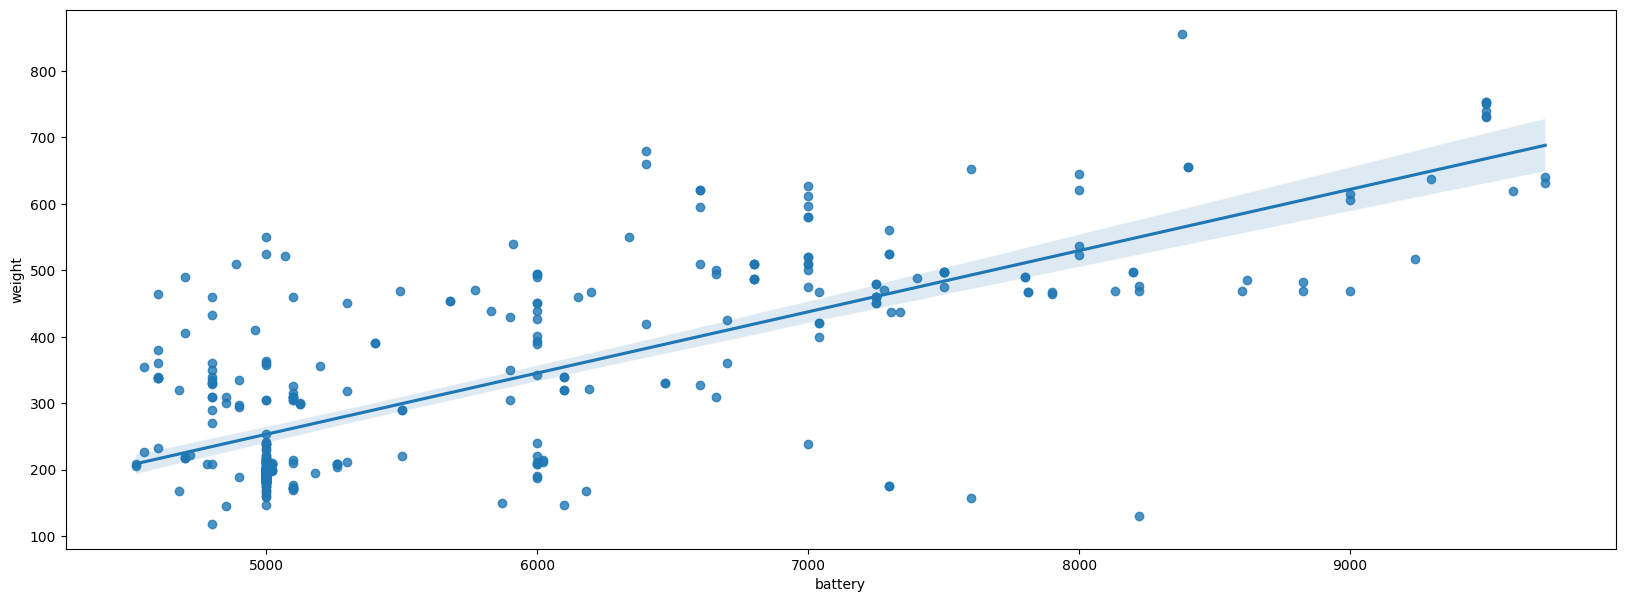

In [42]:
plt.figure(figsize=(20,7))
sns.regplot(x="battery", y ="weight", data=battery);

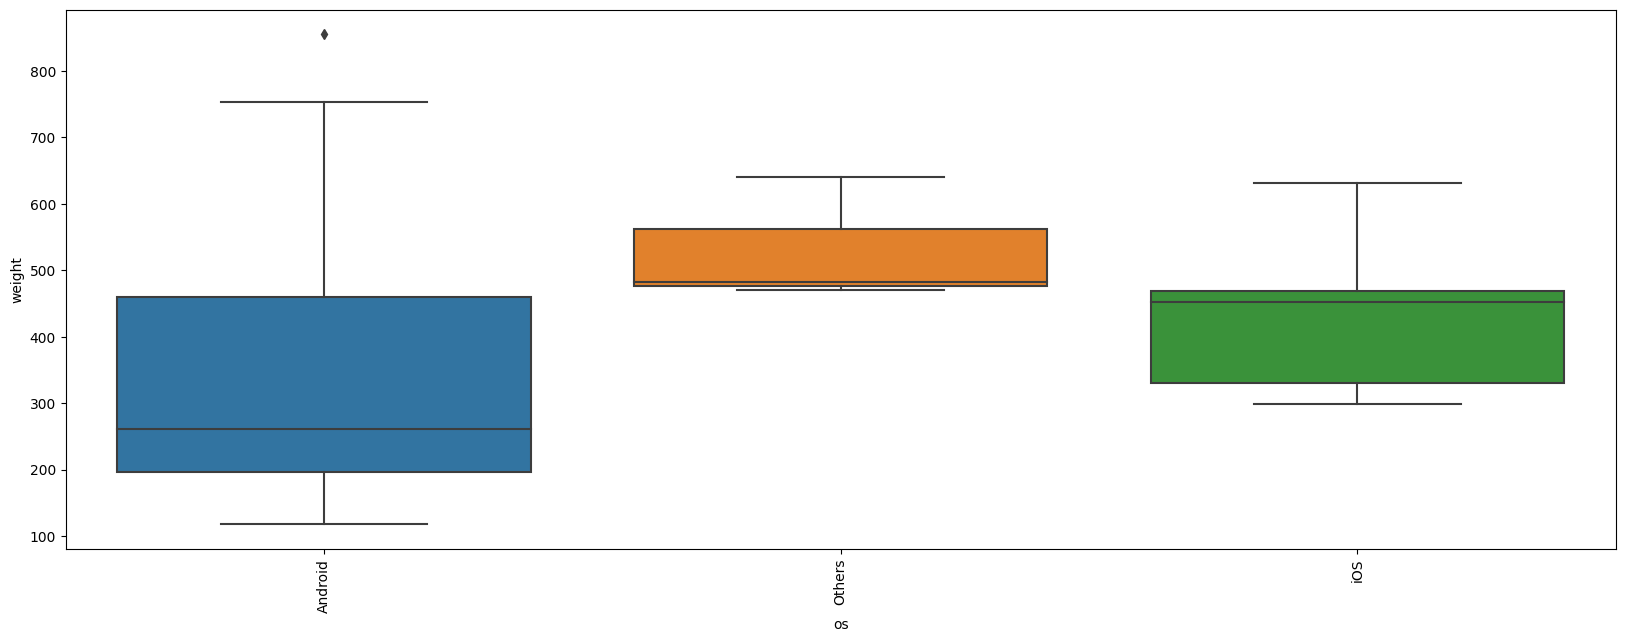

In [43]:
plt.figure(figsize=(20,7))
sns.boxplot(x="os", y ="weight", data=battery)
plt.xticks(rotation=90);

####Observation: Q4: A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

- It get vary exponetionally
- As battery increased, weight gets increasede.
- Samsung brand gives battery 4500mAh to all of their devices, hence all devices are having more weight, as of co-relationship between battery vs weight.
- Majority Android devices are having battery more than 4500mAh and hence their  more heavier.

In [44]:
#Q5: Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available
#across different brands with a screen size larger than 6 inches?

screen_d = data[data.screen_size > 6 * 2.54 ] # 1 inch = 2.54 centimetres
screen_c = screen_d["screen_size"].value_counts()

screen_d.shape


(1099, 15)

In [45]:
screen_d['brand_name'].value_counts().head()

Huawei     149
Samsung    119
Others      99
Vivo        80
Honor       72
Name: brand_name, dtype: int64

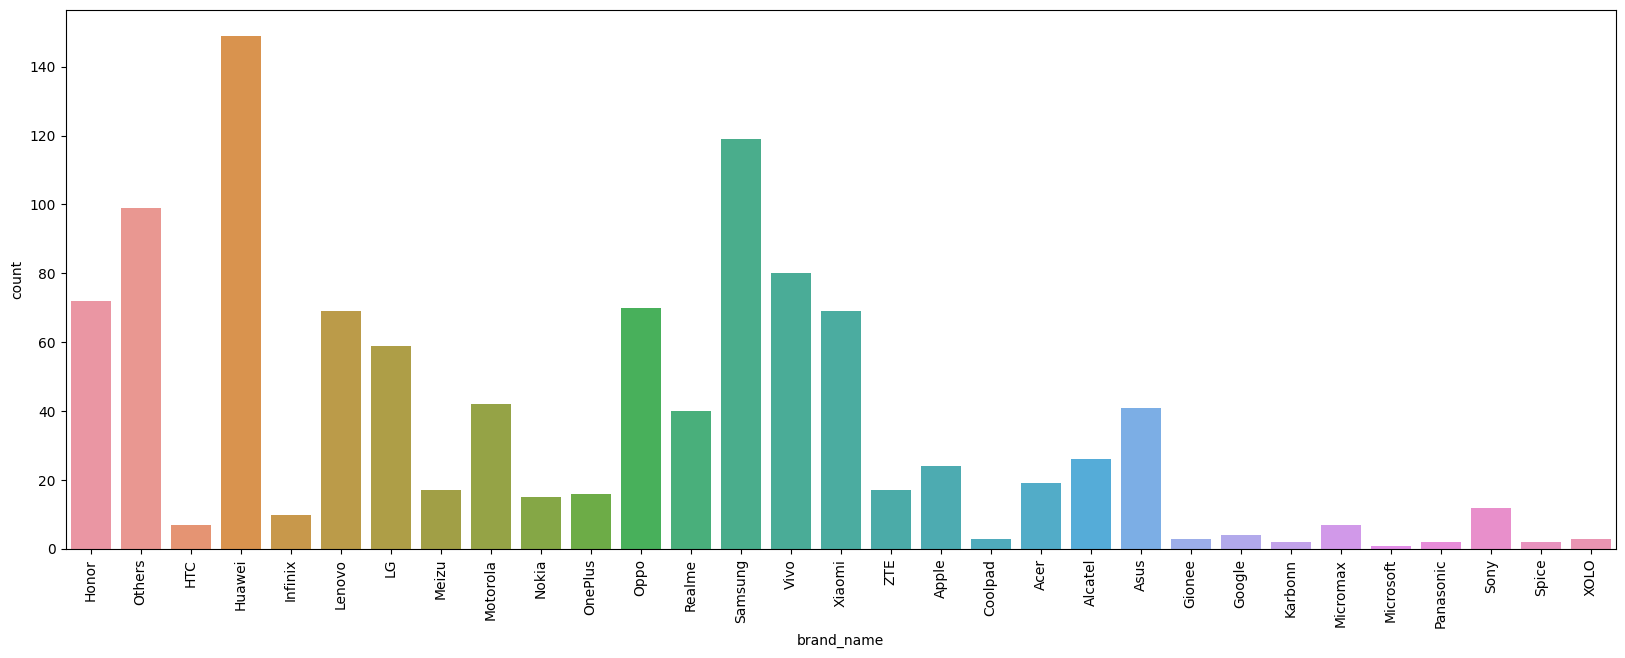

In [46]:
plt.figure(figsize=(20,7))
sns.countplot(data=screen_d, x='brand_name');
plt.xticks(rotation=90);

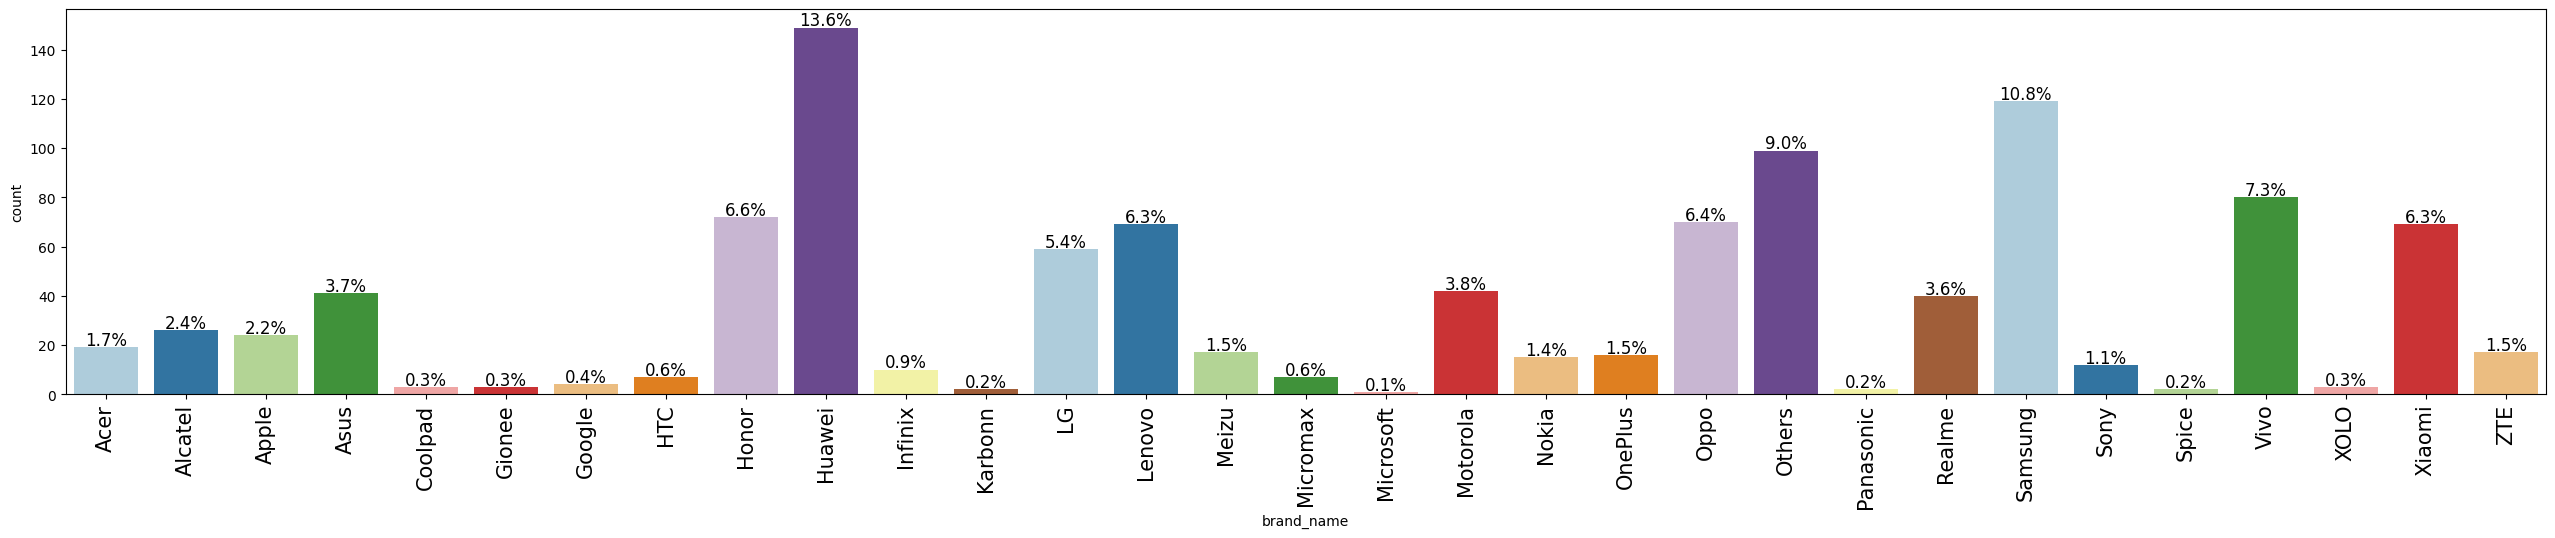

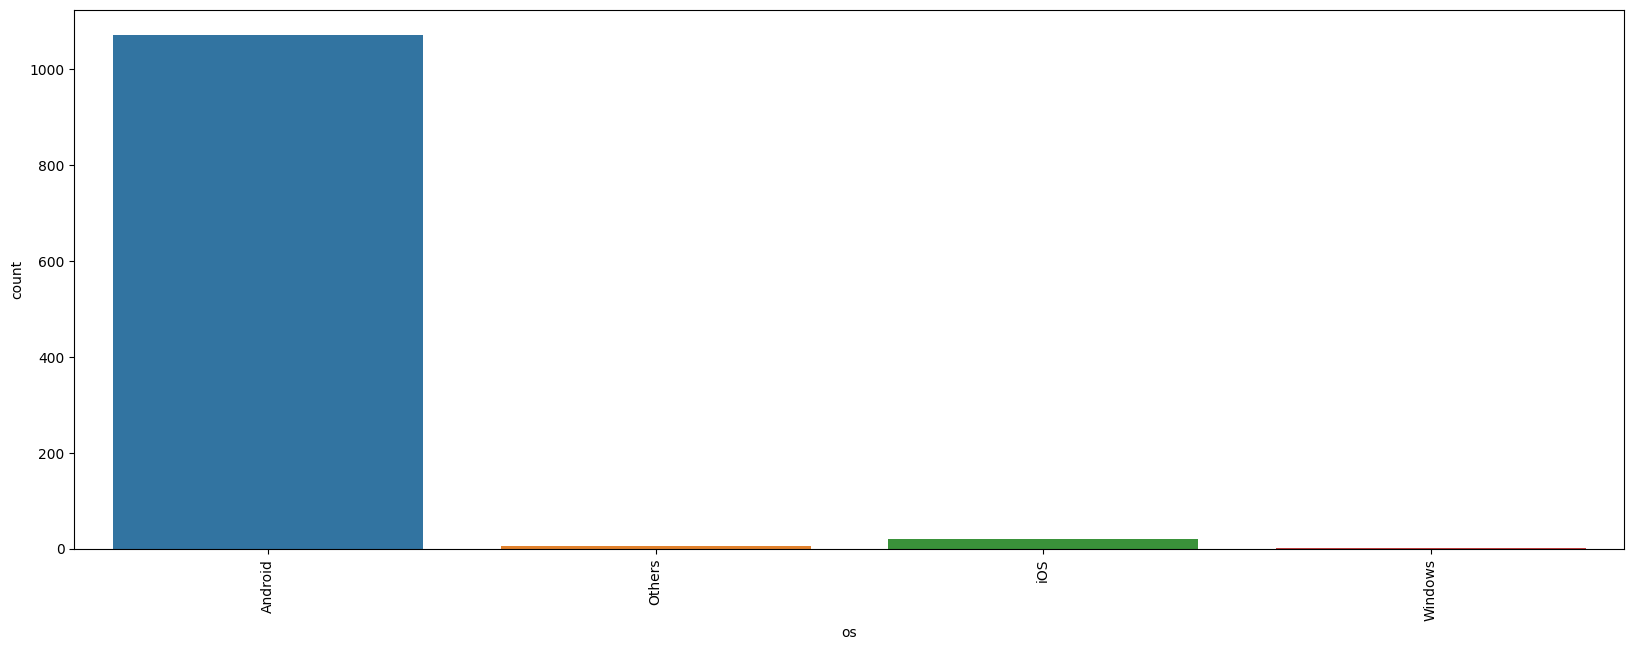

In [47]:
plt.figure(figsize=(20,7))
sns.countplot(data=screen_d, x='os');
plt.xticks(rotation=90);

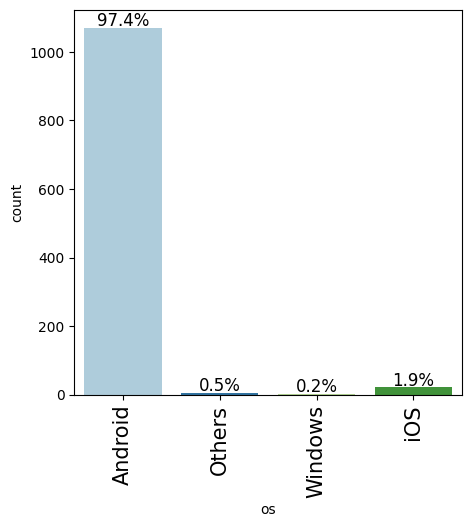

####Observation: Q5: Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

- Huawei brand name has maximum device with >6  screen size.
- Majority Android os devices are larger than 6 inches.

In [48]:
#Q6: A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones.
#What is the distribution of devices offering greater than 8MP selfie cameras across brands?

camera_d = data[data['main_camera_mp'] > 8.0]
camera_d.shape

(1560, 15)

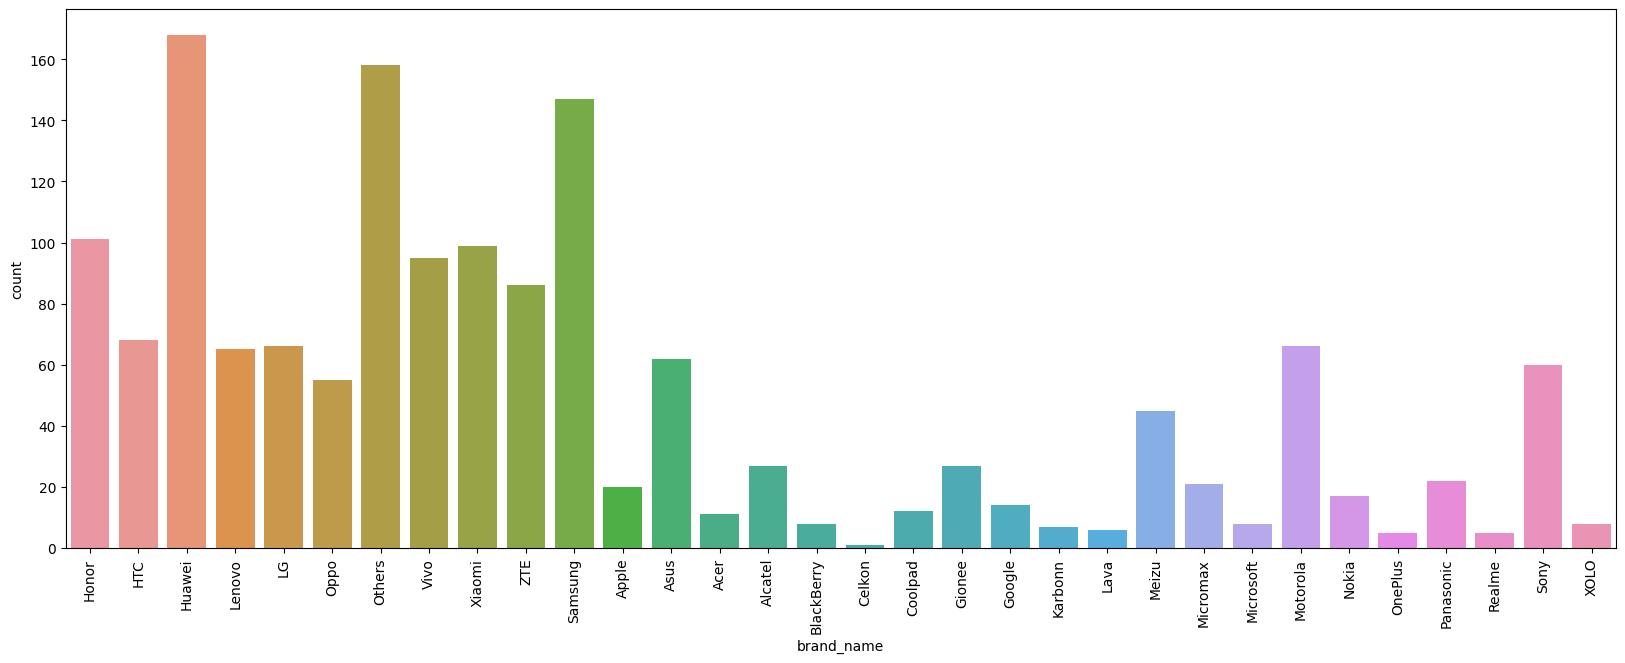

In [49]:
plt.figure(figsize=(20,7))
sns.countplot(data=camera_d, x='brand_name');
plt.xticks(rotation=90);

####Observation: Q6: A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

- It is not normal distribution
- Huawei, Others and Samsung has highest number of device which has more than 8 mp cameras

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [51]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


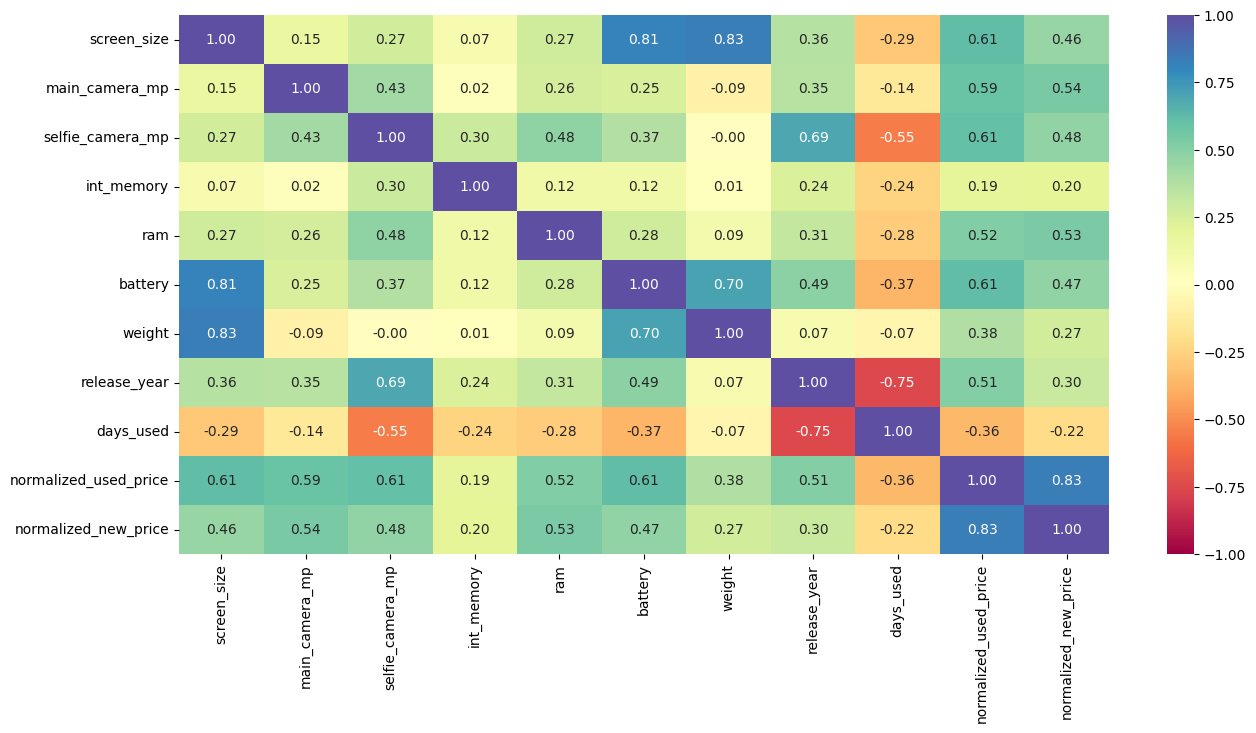

In [52]:
#Q7: Which attributes are highly correlated with the normalized price of a used device?

# Write the code here
# Check for correlation among numerical variables
num_var = ['screen_size','main_camera_mp','selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_used_price', 'normalized_new_price']

corr = data[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

####Observation: Q7: Which attributes are highly correlated with the normalized price of a used device?

- The normalized price of a used device is strong co-relation with normalized new price
- The normalized price of a used  device has very weak co-relation with days used

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [53]:
# Missing value treatment
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [54]:
impute_columns = ['main_camera_mp','selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']

for column in  impute_columns:
  data[column] = data.groupby(['brand_name','release_year'])[column].transform(
      lambda a: a.fillna(a.median()))

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [55]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [56]:
impute_columns = ['main_camera_mp','selfie_camera_mp', 'battery', 'weight']

for column in  impute_columns:
  data[column] = data.groupby(['brand_name'])[column].transform(
      lambda a: a.fillna(a.median()))

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [57]:
data.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [58]:
data['main_camera_mp'] = data['main_camera_mp'].fillna(data['main_camera_mp'].median())

In [59]:
data.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [64]:
data['weight_log'] = np.log(data['weight'])
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release,weight_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1,5.361292
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1,5.220356


In [65]:
data.drop(['weight'], axis=1, inplace=True)

In [67]:
# Feature engineering (if needed)

data['years_since_release'] = 2021 - data['release_year']
data.drop('release_year', axis=1, inplace=True) # drop release_year column
data['years_since_release'].describe()

KeyError: ignored

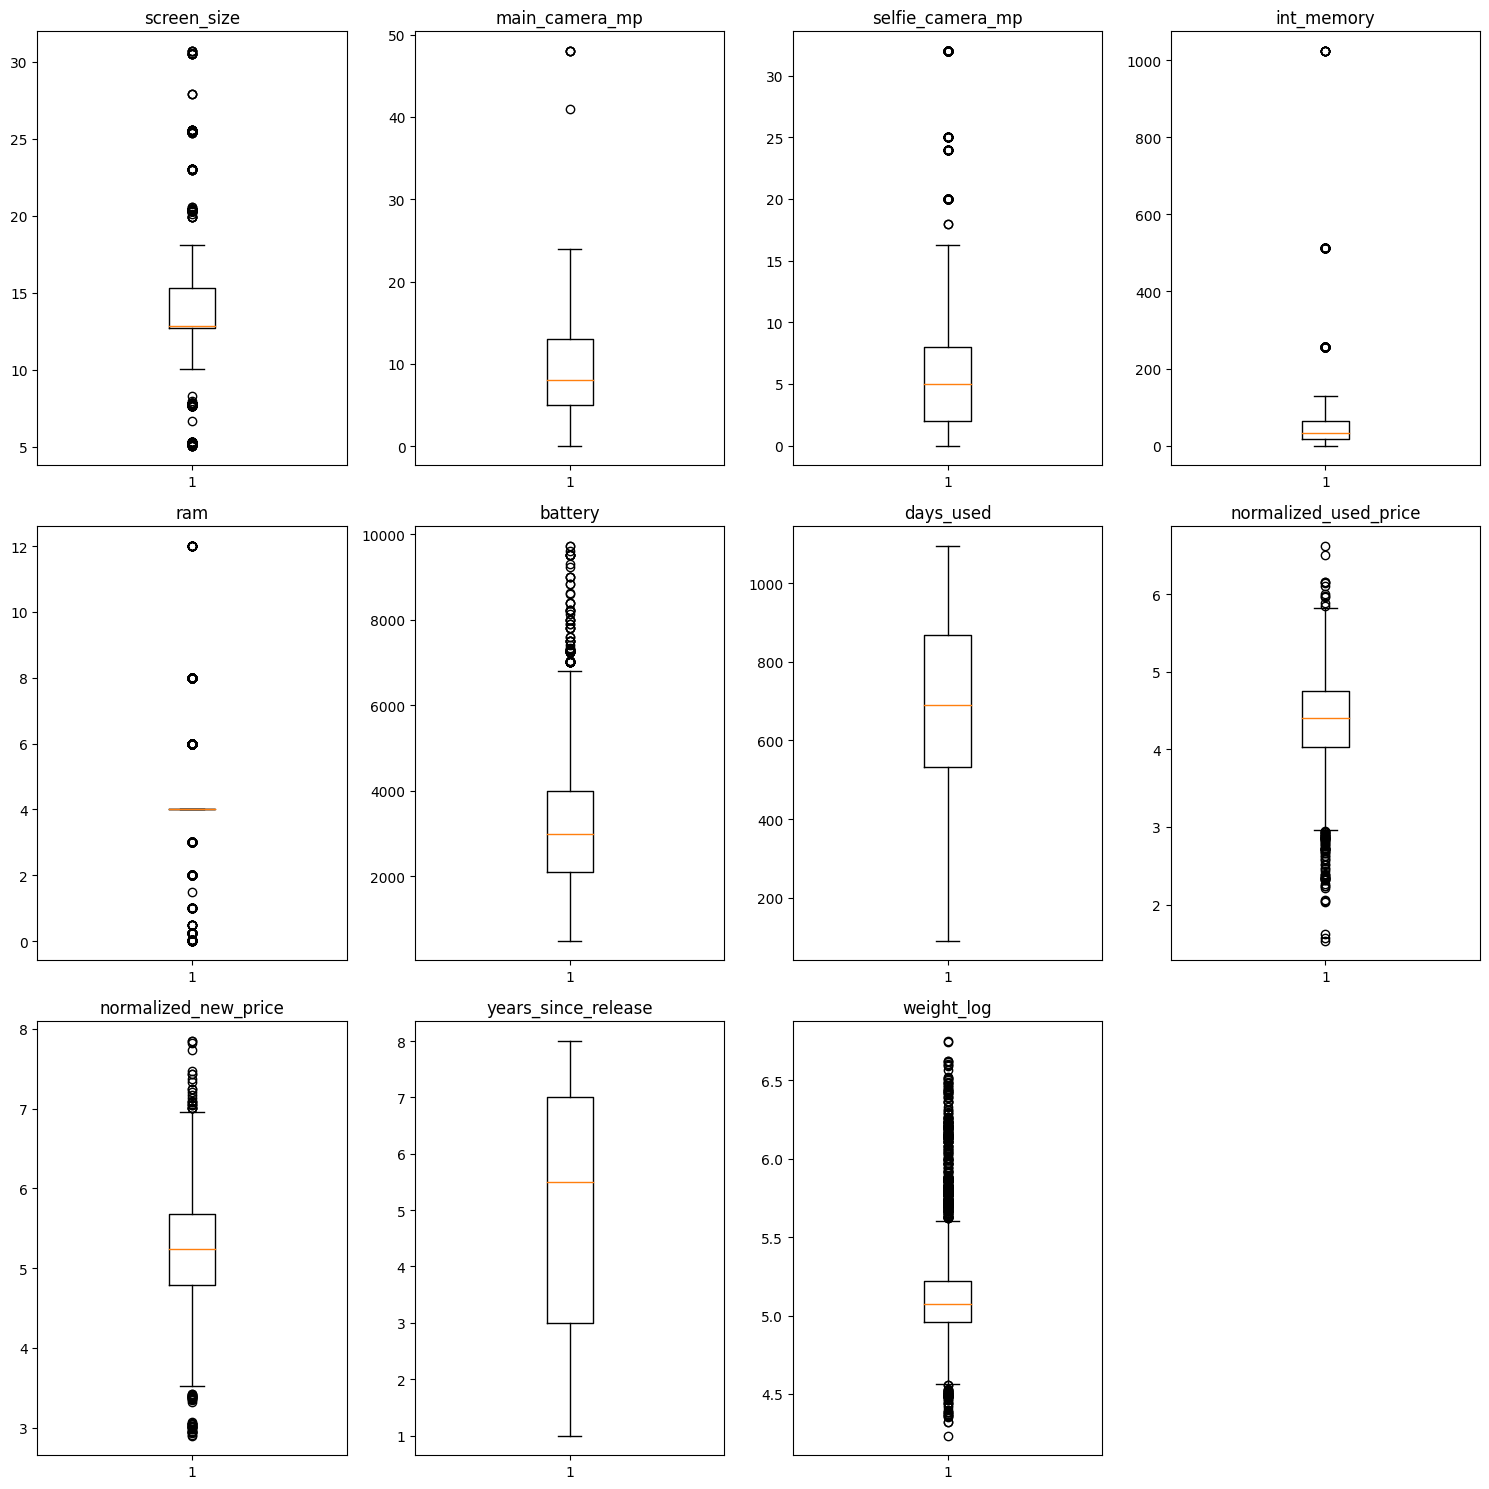

In [69]:
# Outlier detection and treatment (if needed)

n_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(n_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [71]:
# How to take care of Outliers????
def treatment_outliers(data, col):

  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  IQR = q3 - q1
  lower_w = q1 - 1.5 * IQR
  upper_w = q3 + 1.5 * IQR

  data[col] = np.clip(data[col], lower_w , upper_w)

  return data

def all_outlier_treatment(data, c_list):
  for c in c_list:
    data = treatment_outliers(data,c)
  return data

In [72]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_used_price,normalized_new_price,years_since_release,weight_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,127,4.307572,4.715100,1,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,325,5.162097,5.519018,1,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,162,5.111084,5.884631,1,5.361292
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,345,5.135387,5.630961,1,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,293,4.389995,4.947837,1,5.220356


In [73]:
# Which columns to get treated?

t_outliers_cols = ['weight_log', 'normalized_new_price', 'battery', 'int_memory', 'selfie_camera_mp', 'main_camera_mp', 'screen_size']

In [74]:
dt = all_outlier_treatment(data, t_outliers_cols)

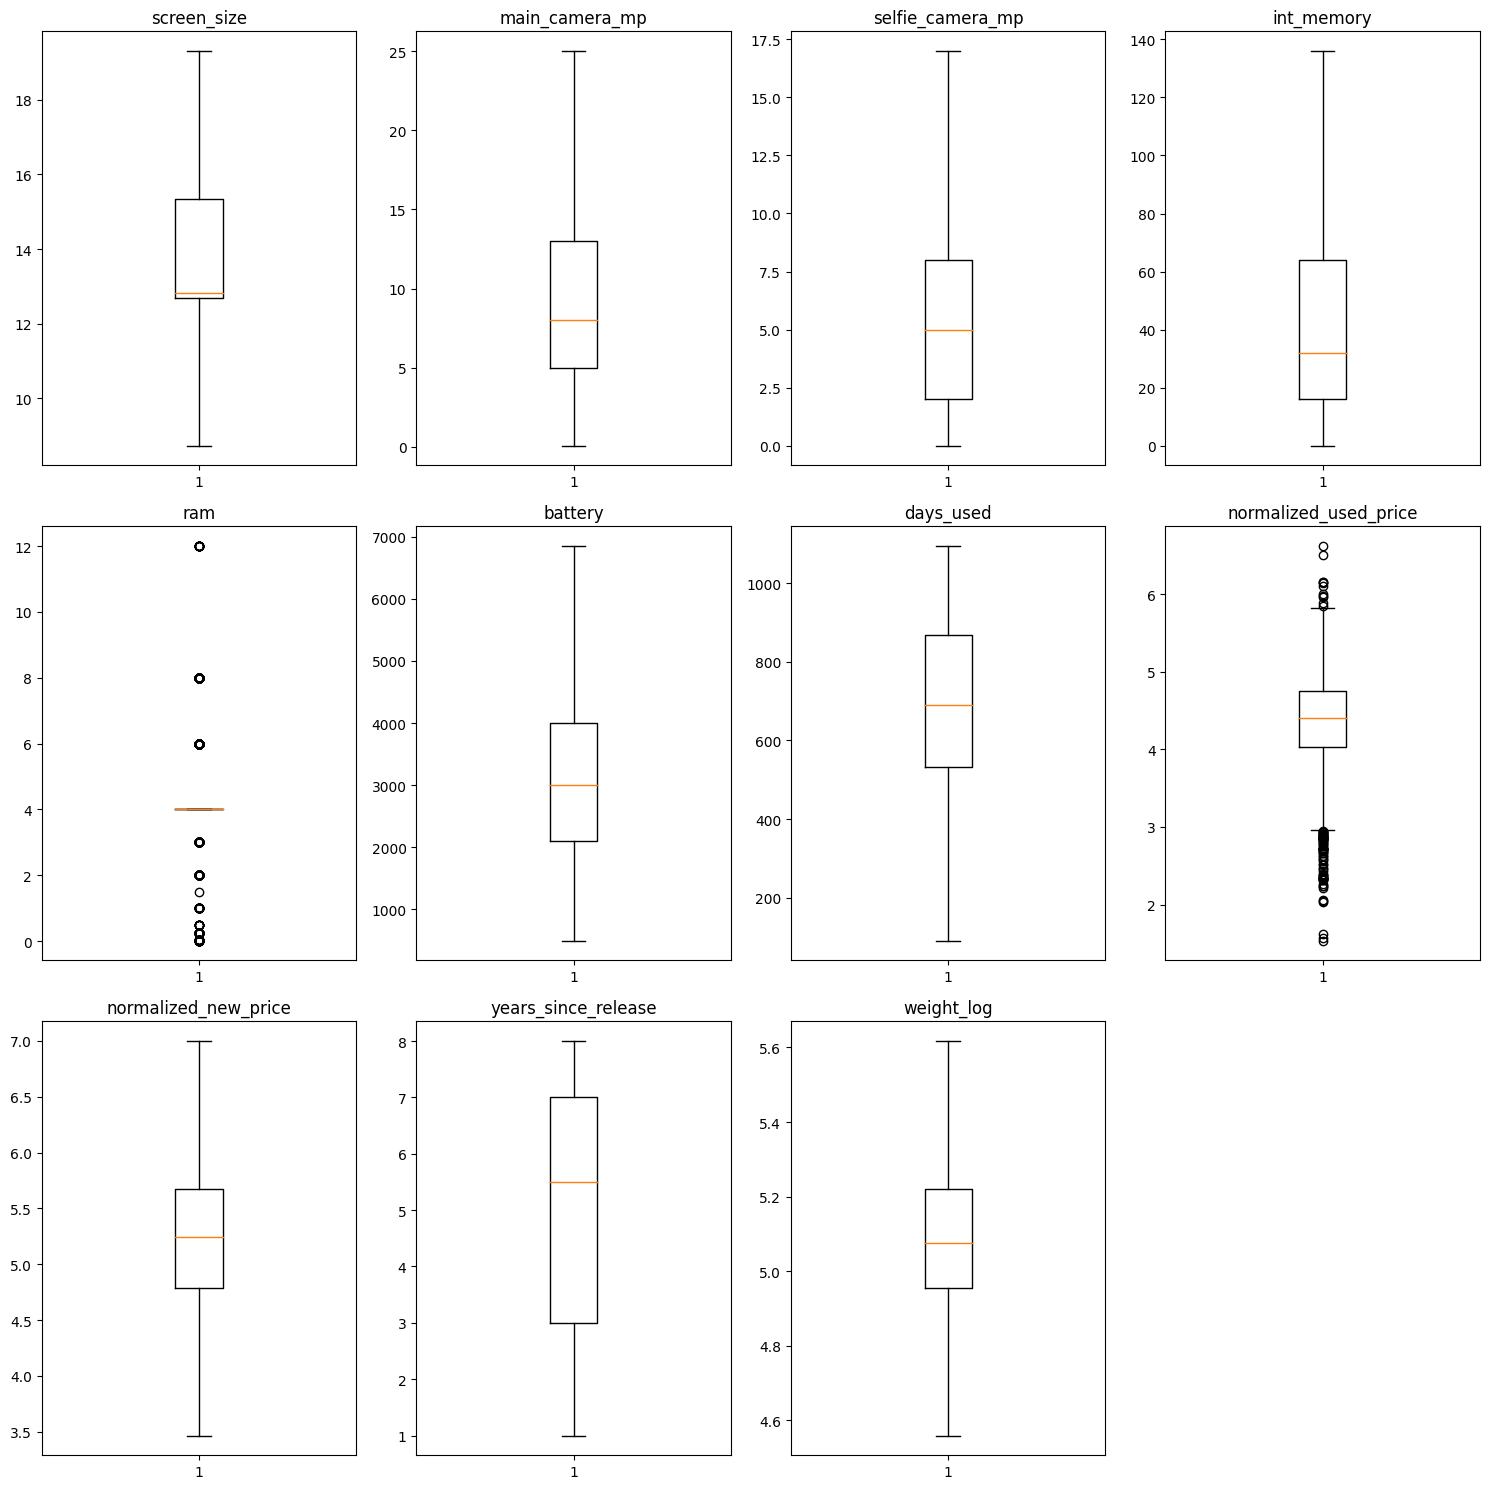

In [75]:
#how it looks now???

n_columns = dt.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(n_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [76]:
# Preparing data for modeling

X = dt.drop(['normalized_used_price'], axis=1)
Y = dt['normalized_used_price']

print(X.head())

print()

print(Y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        19.30  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  days_used  \
0               5.0        64.0  3.0   3020.0        127   
1              16.0       128.0  8.0   4300.0        325   
2               8.0       128.0  8.0   4200.0        162   
3               8.0        64.0  6.0   6850.0        345   
4               8.0        64.0  3.0   5000.0        293   

   normalized_new_price  years_since_release  weight_log  
0              4.715100                    1    4.983607  
1              5.519018                    1    5.361292  
2              5.884631                    1    5.361292  
3              5.6

In [77]:
X = sm.add_constant(X)

In [78]:
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object','category']).columns.tolist(), drop_first=True)

X = X.astype(float)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_new_price,years_since_release,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,127.0,4.715100,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,325.0,5.519018,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,162.0,5.884631,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,19.30,13.0,8.0,64.0,6.0,6850.0,345.0,5.630961,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,293.0,4.947837,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [79]:
dt.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.551595,2.807499,8.74,12.7,12.83,15.34,19.3
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.586329,4.572418,0.08,5.0,8.0,13.0,25.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,5.96242,5.345927,0.0,2.0,5.0,8.0,17.0
int_memory,3454.0,NaN,NaN,NaN,44.694079,39.079988,0.01,16.0,32.0,64.0,136.0
ram,3454.0,NaN,NaN,NaN,4.03262,1.368598,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3109.100898,1212.793754,500.0,2100.0,3000.0,4000.0,6850.0


In [80]:
dt.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
days_used                0
normalized_used_price    0
normalized_new_price     0
years_since_release      0
weight_log               0
dtype: int64

In [81]:
dt['brand_name'].nunique()

34

In [82]:
dt.drop(['brand_name'], axis=1, inplace=True)
dt.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_used_price,normalized_new_price,years_since_release,weight_log
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,127,4.307572,4.715100,1,4.983607
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,325,5.162097,5.519018,1,5.361292
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,162,5.111084,5.884631,1,5.361292
3,Android,19.30,yes,yes,13.0,8.0,64.0,6.0,6850.0,345,5.135387,5.630961,1,5.617149
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,293,4.389995,4.947837,1,5.220356


In [83]:
dt.dtypes

os                        object
screen_size              float64
4g                        object
5g                        object
main_camera_mp           float64
selfie_camera_mp         float64
int_memory               float64
ram                      float64
battery                  float64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
years_since_release        int64
weight_log               float64
dtype: object

## Model Building - Linear Regression

In [85]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [86]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [94]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.836
Method:                    Least Squares   F-statistic:                     257.2
Date:                   Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                           03:29:13   Log-Likelihood:                 79.179
No. Observations:                   2417   AIC:                            -60.36
Df Residuals:                       2368   BIC:                             223.4
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


####Observations:

- R-squred and Adjusted R- Squred are equal and value is 0.836
- The y-intercept is equal to the value of the const coeffiecient which is -0.1903


## Model Performance Check

In [89]:
# Calculate Adjusted R Squared
def adj_r2_score(predictors, targets, predictions):
  r2 = r2_score(targets, predictions)
  n = predictors.shape[0]
  k = predictors.shape[1]
  return 1 - ((1-r2) * (n-1) / (n-k-1))

#Compute MAPE
def mape_score(targets, predictions):
  return np.mean(np.abs(targets - predictions) / targets) * 100

# Compute different metrics to check performence of a regression model
def model_performance_regression(model, predictors, target):
  pred = model.predict(predictors)

  r2 = r2_score(target, pred)

  adjur2 = adj_r2_score(predictors, target, pred)

  rmse = np.sqrt(mean_squared_error(target, pred))

  mae = mean_absolute_error(target, pred)

  mape = mape_score(target, pred)

  df_perf = pd.DataFrams({
      'RMSE': rmse,
      'MAE': mae,
      'R-squred': r2,
      'Adjusted R-squred': adjur2,
      'MAPE': mape
  },
  index=[0],
  )
  return df_perf

In [95]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



AttributeError: ignored

In [96]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



AttributeError: ignored

####Observations:

- The Training R Squred is 0.836, so the model is not underfitting
- The train and test RMSE and MAE are comparable, so the model is not overfitting either.
- MAE suggests that the model can predict the price of a used device within a mean error of 0.187 on the test data.



## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### Test for multicollinaerity:

- This predictor variables in the regression model should not be correlated, hence no multicollinearity

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [98]:
def checking_vif(x_train):


SyntaxError: ignored

####Observations:

- If VIF is between 1 and 5, then there is low multicollinearity.
- If VIF is between 5 and 10, we say there is moderate multicollinearity.
- If VIF is exceeding 10, it shows signs of high multicollinearity.

In [99]:
  def treating_multicollinearity(predictors, target, high_vif_columns):
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            'col': high_vif_columns,
            'Adj. R-squared after_dropping col': adj_r2,
            'RMSE after dropping col': rmse,
        }
    ).sort_values(by='Adj. R-squared after_dropping col', ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [100]:
col_list = [
    'screen_size',
    'years_since_release'
]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,years_since_release,0.835686,0.236652
1,screen_size,0.829043,0.241388


In [101]:
col_to_drop = 'years_since_release'
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print('VIF after dropping', col_to_drop)
vif


VIF after dropping years_since_release


,feature,VIF
0,const,1389.473378
1,screen_size,5.291730
2,main_camera_mp,2.471280
3,selfie_camera_mp,3.395168
4,int_memory,2.401841
5,ram,2.221467
6,battery,3.638106
7,days_used,1.983466
8,normalized_new_price,3.051289
9,weight_log,4.573239


In [102]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.836
Method:                    Least Squares   F-statistic:                     262.4
Date:                   Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                           03:40:45   Log-Likelihood:                 77.965
No. Observations:                   2417   AIC:                            -59.93
Df Residuals:                       2369   BIC:                             218.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


####Observation:

- Adjusted R-squared has not changed. That means dropping columns won't make any difference.
- There is NO multicollinearity. Hence  can check the p-value of predictors variables.

### Dropping high p-value variables:

- const, battery, days_used, os_Windows, os_iOS and 5g_yes have p-value > 0.05. So, they are not significant and we'll drop them all one at a time except the constant.

In [103]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'normalized_new_price', 'weight_log', 'brand_name_Apple', 'brand_name_Micromax', 'brand_name_Nokia', 'brand_name_Sony', 'brand_name_Vivo', 'os_Others', 'os_iOS', '4g_yes']


In [104]:
x_train3 = x_train2[["const"] + selected_features]
x_test3 = x_test2[["const"] + selected_features]

In [105]:
# print model summary
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.836
Method:                    Least Squares   F-statistic:                     822.1
Date:                   Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                           03:46:13   Log-Likelihood:                 64.129
No. Observations:                   2417   AIC:                            -96.26
Df Residuals:                       2401   BIC:                            -3.614
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

####Observations:

- Adjusted R-squred is still 0.836.
- Also, Adjusted R-squred in Olsmodel is also 0.836. Hence can conclude that the dropped variables are not affecting our model.

### Test for Linearity & Independence

In [106]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.808485,0.279002
1525,4.448399,4.675108,-0.226708
1128,4.315353,4.324568,-0.009215
3003,4.282068,4.199286,0.082782
2907,4.456438,4.498975,-0.042537


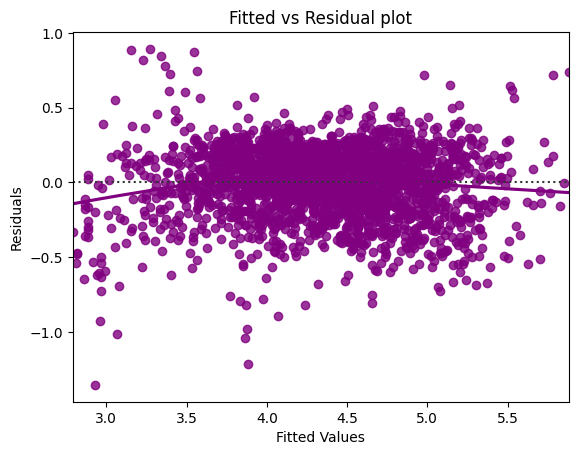

In [107]:
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

####Observation:

- The scatter plot shows the distribution of residuals (errors) vs predicted values.
- There is no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.


###Test for Normality

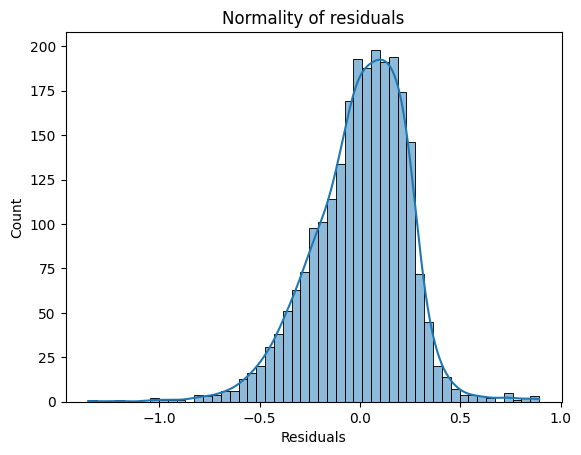

In [108]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

####Observations:

- The histogram of Residuals have bell shape


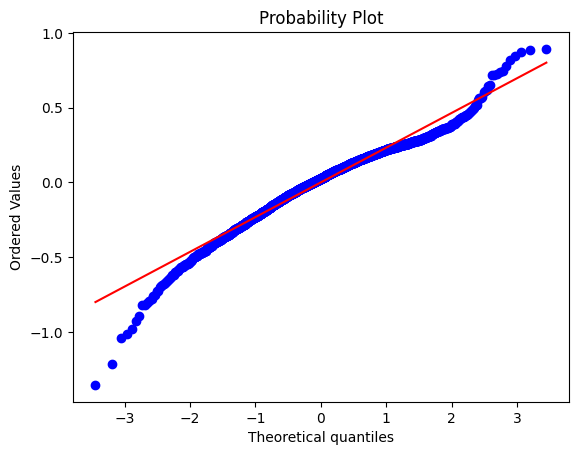

In [109]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

####Observations:

- The residuals follows a straight line except in tails area.

In [110]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.97218918800354, pvalue=2.873241544116527e-21)

####Observations:

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.

### Test for Homoscedasticity:

In [111]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)


[('F statistic', 1.0496685101886736), ('p-value', 0.20130916480445962)]

####Observation:

- p-value > 0.05, hence, the residuals are homoscedastic.

In [112]:
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.408781
2341,3.696103,3.954907
1913,3.592093,3.665229
688,4.306495,4.144196
650,4.522115,5.149085
2291,4.259294,4.407157
40,4.997685,5.298763
1884,3.875359,4.022660
2538,4.206631,3.981029
45,5.380450,5.391872


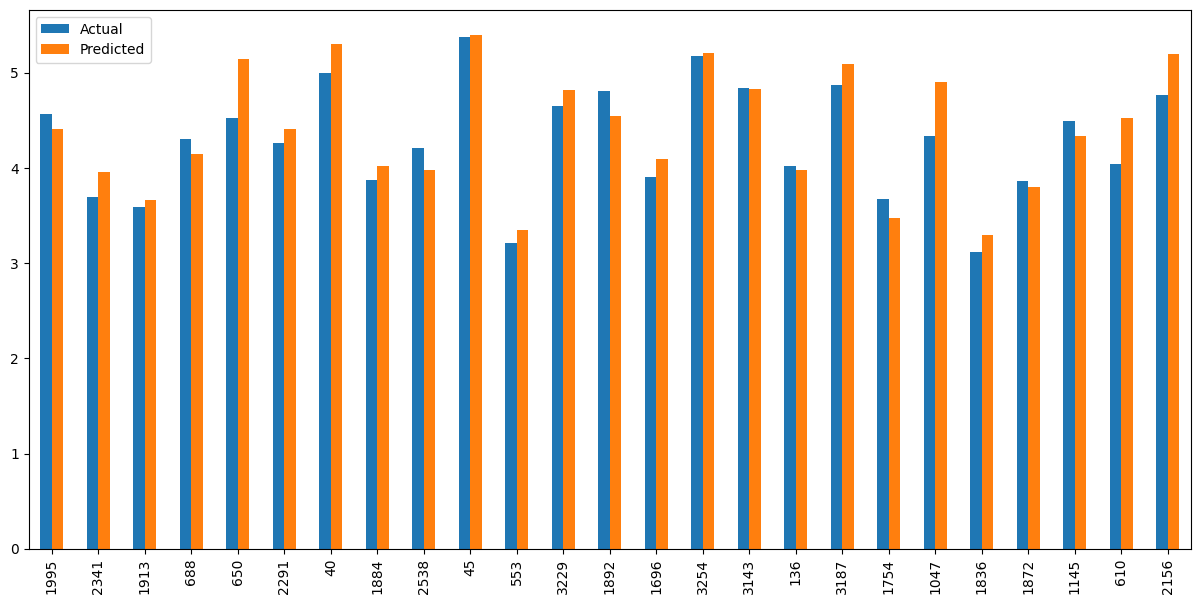

In [113]:
df3 = df_pred_test.sample(25, random_state=1)
df3.plot(kind="bar", figsize=(15, 7))
plt.show()


## Final Model

In [114]:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.836
Method:                    Least Squares   F-statistic:                     822.1
Date:                   Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                           04:01:22   Log-Likelihood:                 64.129
No. Observations:                   2417   AIC:                            -96.26
Df Residuals:                       2401   BIC:                            -3.614
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [115]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmodel_final, x_train3, y_train)
olsmod2_train_perf

Training Performance



AttributeError: ignored

In [116]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmodel_final, x_test3, y_test)
olsmod2_test_perf

Test Performance



AttributeError: ignored

####Observations:

- The model is able to explain ~83% of the variation in the data. Good model :-)

- The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

T- he Mean Absolute Percentage Error(MAPE) on the test set suggests we can predict the used devices prices within 4.6% error which is good because it is a low value

- Concluzation: the model olsmod2 is good for prediction as well as inference purposes.

## Actionable Insights and Recommendations

-

- normalized_new_price has a strong positive correlation with used price. Hence the higher the price of the new device the higher the price of the same device in refurbished market.

- 1 unit increase in weight of the device leads to increase in the price of the refurbished device by 0.2612 euros

- screen_size, main_camera_mp, selfie_camera_mp, int_memory, ram, normalized_new_price, weight_log ,4G have positive coefficients. So, as they increase, the price of used devices also increases.

- Operating systems of devices other than Android, iOS, and windows have negative coefficients. Hence as they increase, the price of used devices decrease.

- In summary therefore, the factors that significantly influence the price of refurbished devices in the market are as listed as below; - Size of the screen of the devices - Main camera mega pixels - selfie camera pixels - internal memory - RAM of the devices - Price of the similar new device - weight of the devices - Whether the device is a 4G or not - Operating system



___

In [117]:
!jupyter nbconvert --to html SLF_ReCell_FullCode_DhwaniTrivedi.ipynb

[NbConvertApp] Converting notebook SLF_ReCell_FullCode_DhwaniTrivedi.ipynb to html
[NbConvertApp] Writing 2128598 bytes to SLF_ReCell_FullCode_DhwaniTrivedi.html
